In [2]:
import os
# import drjit
gpu_num = 3 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy
from pathlib import Path
from cycler import cycler

In [3]:
exclude_list = ['bers/report/singular_values.pickle']
files = Path('bers/report').glob('**/*.pickle')
for f in files:
    if str(f) not in exclude_list:
        print(f)

bers/report/frequency/perf_vs_est_csi.pickle
bers/report/frequency/velocity_mitigation.pickle
bers/report/frequency/velocity_factors.pickle
bers/report/frequency/bler_params.pickle
bers/report/frequency/num_ues_est_csi.pickle
bers/report/frequency/num_ues_mitigated.pickle
bers/report/frequency/ian_vs_pos.pickle
bers/report/frequency/num_ues.pickle
bers/report/frequency/num_silent.pickle
bers/report/frequency/mitigation_dim.pickle
bers/report/frequency/perf_vs_est_csi_multi_ut.pickle


In [3]:
from itertools import compress

def set_style(plot_ber, cycler, is_bler=False, **kwargs):
    assert not is_bler, "BLER is not supported"
    snrs = list(compress(plot_ber._snrs, np.invert(plot_ber._is_bler)))
    bers = list(compress(plot_ber._bers, np.invert(plot_ber._is_bler)))
    legends = list(compress(plot_ber._legends, np.invert(plot_ber._is_bler)))
    is_bler = list(compress(plot_ber._is_bler, np.invert(plot_ber._is_bler)))

    fig, ax = sionna.utils.plot_ber(
        snrs,
        bers,
        legends,
        title = plot_ber.title,
        is_bler = is_bler,
        **kwargs
    )

    cycler_iter = cycler()
    for i, l in enumerate(ax.get_lines()):
        l.set(**next(cycler_iter))
    ax.legend(legends, fontsize=20)
    return fig

In [4]:
f = 'bers/report/frequency/perf_vs_est_csi.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(1e-6, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/velocity_mitigation.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(1e-5, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/velocity_factors.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    # TODO change linestyle of no mobility
    ber = pickle.load(file)
    ber.title = 'Mobility: Impact of parameters at 120 km/h'
    ber._legends = ['No Mobility', '3.5GHz CF, 30kHz SCS, 128 SCs', '450MHz CF', '240kHz SCS, 16 SCs', '1024 SCs']
    ber(ylim=(1e-5, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/bler_params.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(show_ber=False, ylim=(None, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/ian_vs_pos.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(1e-5, 1), save_fig=True, path=graph_file)

f = 'bers/report/frequency/num_ues.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber.remove(2)
    ber.remove(2)
    ber.title = 'Perf. CSI, 1x1 Jammer: Impact of number of UEs'
    line_props = cycler(color=['b', 'r']) * cycler(ls=['-.', '-'])
    fig = set_style(ber, line_props, ylim=(1e-3, 1))
    plt.savefig(graph_file)
    plt.close(fig)
    # ber(ylim=(None, 1))

f = 'bers/report/frequency/num_ues_est_csi.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber.remove(2)
    ber.remove(2)
    ber.title = 'Est. CSI, 1x1 Jammer: Impact of number of UEs'
    line_props = cycler(color=['b', 'r']) * cycler(ls=['-.', '-'])
    fig = set_style(ber, line_props, ylim=(1e-3, 1))
    plt.savefig(graph_file)
    plt.close(fig)

f = 'bers/report/frequency/num_silent.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    line_props = cycler(color=plt.cm.viridis(np.linspace(0.3, 0.9, 7))) * cycler(linestyle=['-'])
    line_props = cycler(color=['r'], linestyle=['-.']).concat(line_props)
    fig = set_style(ber, line_props, ylim=(5e-4, 1))
    plt.savefig(graph_file)
    plt.close(fig)

f = 'bers/report/frequency/num_silent_1x3.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    line_props = cycler(color=plt.cm.viridis(np.linspace(0.3, 0.9, 7))) * cycler(linestyle=['-'])
    line_props = cycler(color=['r'], linestyle=['-.']).concat(line_props)
    fig = set_style(ber, line_props, ylim=(5e-4, 1))
    plt.savefig(graph_file)
    plt.close(fig)

f = 'bers/report/frequency/mitigation_dim.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(ylim=(None, 1), save_fig=True, path=graph_file)

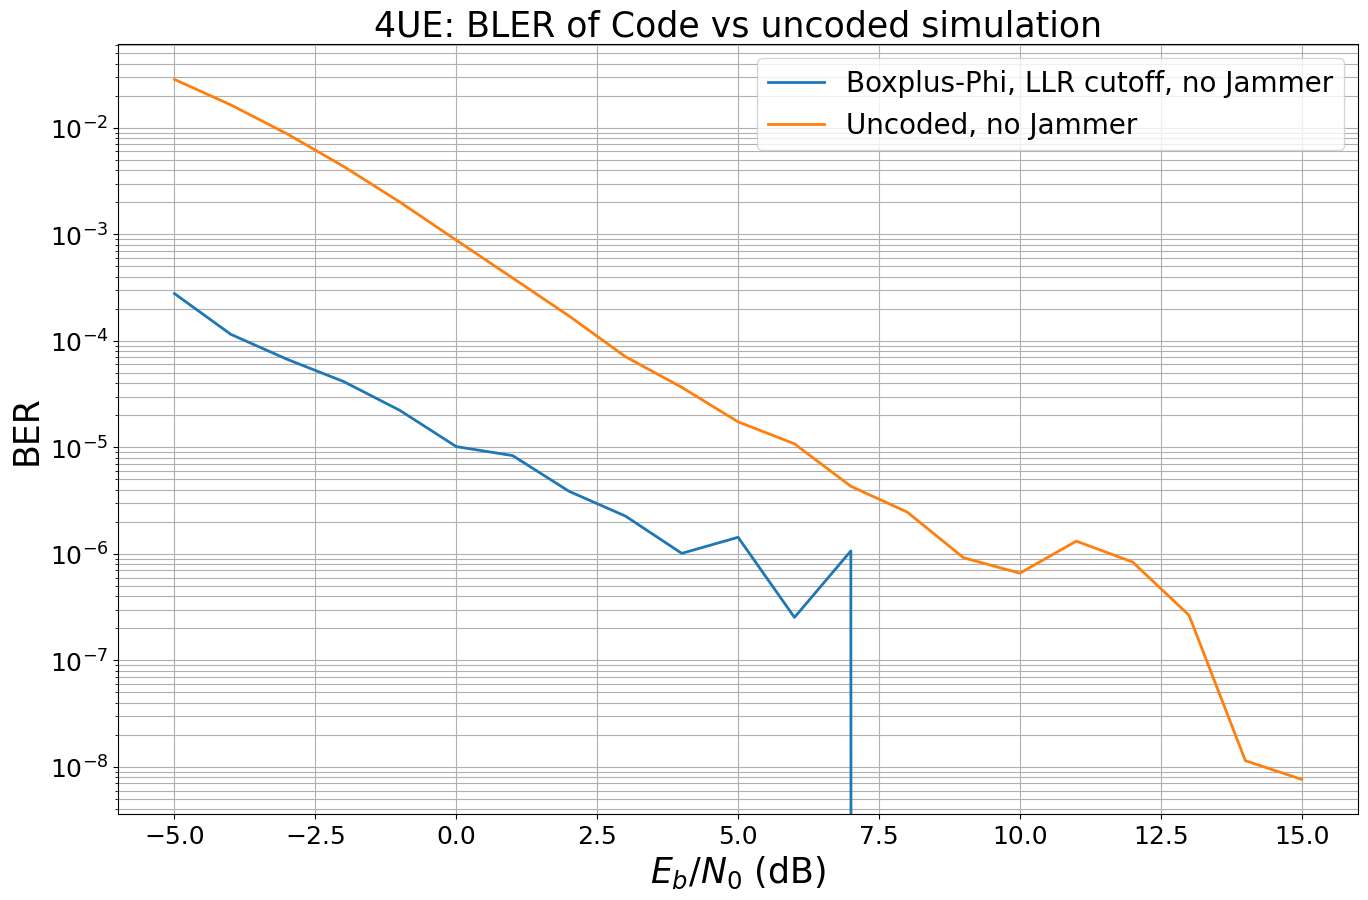

In [5]:
f = 'bers/report/frequency/bler_jammerless.pickle'
graph_file = 'graphs/' + f.split('/', 1)[-1].replace('.pickle', '.png')
with open(f, 'rb') as file:
    ber = pickle.load(file)
    ber(show_ber=False, show_bler=True)
    # ber(ylim=(None, 1), save_fig=True, path=graph_file)
